In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from matplotlib import rcParams
from sklearn.svm import SVR, SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [0]:
sns.set_style('whitegrid')
rcParams['figure.figsize'] = 10,7

In [0]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [4]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [5]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

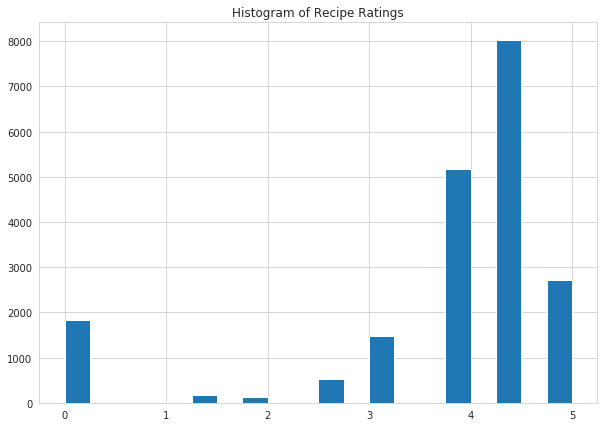

In [6]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [7]:
# Count nulls
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [8]:
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=.3, replace=True, random_state=1)
y = raw_data.rating.sample(frac=.3, replace=True, random_state=1)
svr.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
svr.score(X, y)

-0.003978314483867651

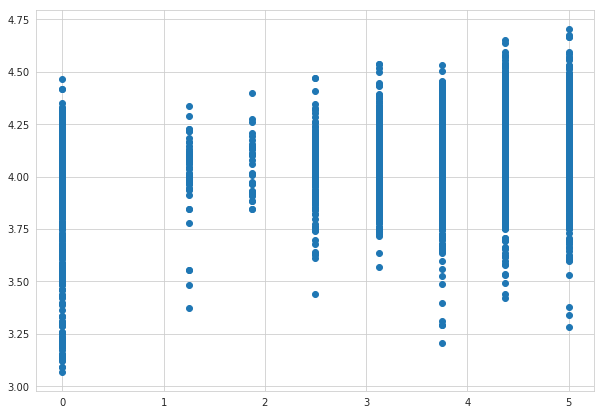

In [10]:
plt.scatter(y, svr.predict(X))

In [11]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,...,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Find the most occurent features
most_features = []


for i in X.columns:
  most_features.append((X[i].sum(), i))
  


In [13]:
sorted(most_features)

[(0.0, '#wasteless'),
 (0.0, 'alabama'),
 (0.0, 'bulgaria'),
 (0.0, 'burrito'),
 (0.0, 'camping'),
 (0.0, 'caviar'),
 (0.0, 'cobbler/crumble'),
 (0.0, 'cook like a diner'),
 (0.0, 'cookbook critic'),
 (0.0, 'cookbooks'),
 (0.0, 'costa mesa'),
 (0.0, 'crêpe'),
 (0.0, 'cr��me de cacao'),
 (0.0, 'cupcake'),
 (0.0, 'dorie greenspan'),
 (0.0, 'england'),
 (0.0, 'epi loves the microwave'),
 (0.0, 'frankenrecipe'),
 (0.0, 'frittata'),
 (0.0, 'germany'),
 (0.0, 'healdsburg'),
 (0.0, 'hollywood'),
 (0.0, 'house cocktail'),
 (0.0, 'houston'),
 (0.0, 'hummus'),
 (0.0, 'iced coffee'),
 (0.0, 'idaho'),
 (0.0, 'iowa'),
 (0.0, 'israel'),
 (0.0, 'jamaica'),
 (0.0, 'japan'),
 (0.0, 'kansas city'),
 (0.0, 'kitchen olympics'),
 (0.0, 'las vegas'),
 (0.0, 'leftovers'),
 (0.0, 'london'),
 (0.0, 'long beach'),
 (0.0, 'louisiana'),
 (0.0, 'lychee'),
 (0.0, 'macaroni and cheese'),
 (0.0, 'mezcal'),
 (0.0, 'miami'),
 (0.0, 'mississippi'),
 (0.0, 'mortar and pestle'),
 (0.0, 'muffin'),
 (0.0, 'nancy silverton')

In [0]:
# Create Correlation matrix
corrmat_1 = X.corr() 


# Select features whos columns are NaN
features_to_remove_1 = []

for i in corrmat_1.columns:
  if corrmat_1[i].isnull().sum() == len(corrmat_1[i]):
    features_to_remove_1.append(i)

In [15]:
len(features_to_remove_1)

72

In [0]:
# Remove those feautres 
X = X.drop(features_to_remove_1, axis=1)

In [0]:
# Second selection of features to remove
features_to_remove_2 = []

corrmat_2 = X.corr()

# removing features which have a mean corrlation value greater than .01
for i in corrmat_2.columns:
  if abs(corrmat_2[i].mean()) > .001:
    features_to_remove_2.append(i)

In [22]:
len(features_to_remove_2)

486

In [0]:
X = X.drop(features_to_remove_2, axis=1)

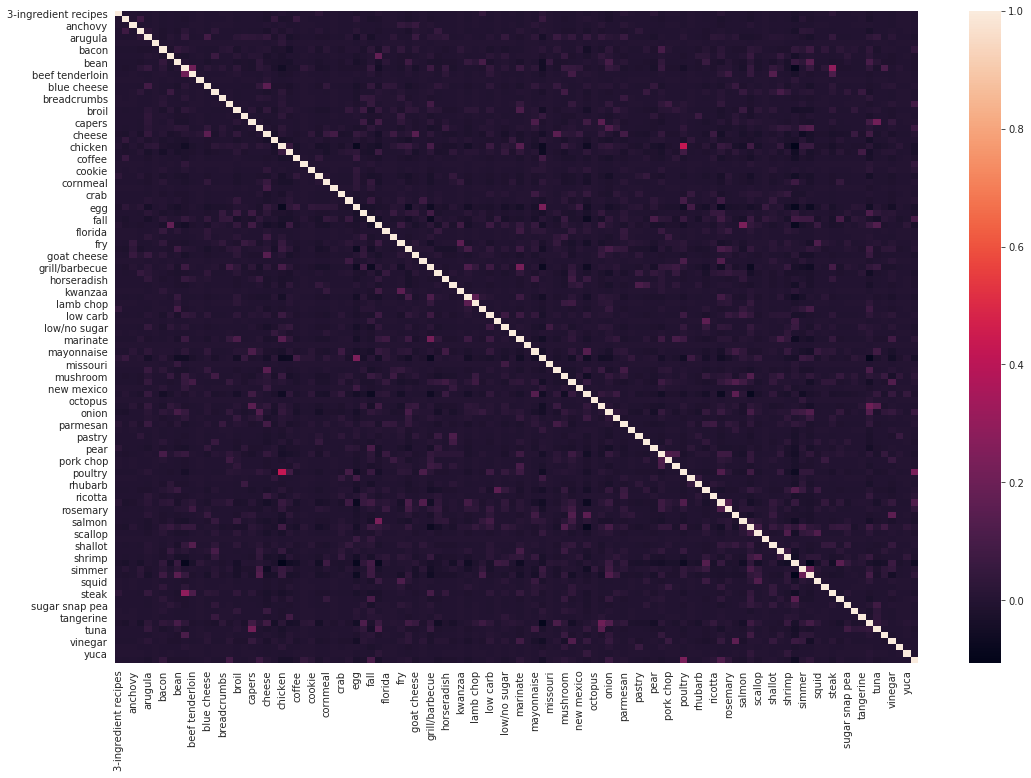

In [24]:
corrmat_3 = X.corr()

plt.figure(figsize=(18,12))
sns.heatmap(corrmat_3)

In [25]:
X.shape

(6016, 108)

In [0]:
# Convert target variable to binary value above or below a rating of 3
bi_y = pd.DataFrame()
bi_y['rating'] = y > 3
bi_y = bi_y.astype(int)

In [28]:
bi_y

,rating
235,1
12172,1
5192,1
17289,1
10955,1
7813,1
19279,1
144,1
16332,1
7751,1


In [29]:
# instantiate model SVC
svc = SVC()

# fit model with current features (108)
svc.fit(X, bi_y)
svc.score(X, bi_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8631981382978723

In [32]:
score = cross_val_score(svc, X, bi_y, cv=10)
print(score)
print(score.mean())

[0.86235489 0.86235489 0.86235489 0.86356073 0.86356073 0.86356073
 0.86356073 0.86356073 0.86356073 0.86356073]
0.8631989801408929


In [0]:
# Add X and y onto the same data frame
X_with_y = X.copy()
X_with_y['target'] = bi_y

In [0]:
# Find features with a low correlation with the target
corrmat_4 = X_with_y.corr()
low_corr = corrmat_4[corrmat_4['target'] < 0.01]

In [42]:
len(low_corr)

47

In [0]:
X = X.drop(low_corr.drop('target', axis=1).index, axis=1)

In [48]:
X.shape

(6016, 61)

In [49]:
X.head()

,amaretto,bacon,bean,beef,blue cheese,bok choy,broil,capers,cheese,chicken,citrus,cornmeal,crab,egg,fall,fish,florida,fontina,garlic,goat cheese,grill/barbecue,honey,kwanzaa,lamb,lamb chop,lentil,low carb,low/no sugar,marinate,milk/cream,mushroom,mustard,new mexico,olive,onion,parmesan,pear,pork,pork chop,pork rib,poultry,rice,ricotta,roast,rosemary,salmon,sauté,scallop,shallot,sherry,shrimp,side,simmer,soup/stew,steak,stuffing/dressing,sugar snap pea,swiss cheese,tomato,veal,yuca
235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# fit model with current shape 61
svc.fit(X, bi_y)
print(svc.score(X, bi_y))

score = cross_val_score(svc, X, bi_y, cv=10)
print(score)
print(score.mean())

0.8631981382978723
[0.86235489 0.86235489 0.86235489 0.86356073 0.86356073 0.86356073
 0.86356073 0.86356073 0.86356073 0.86356073]
0.8631989801408929


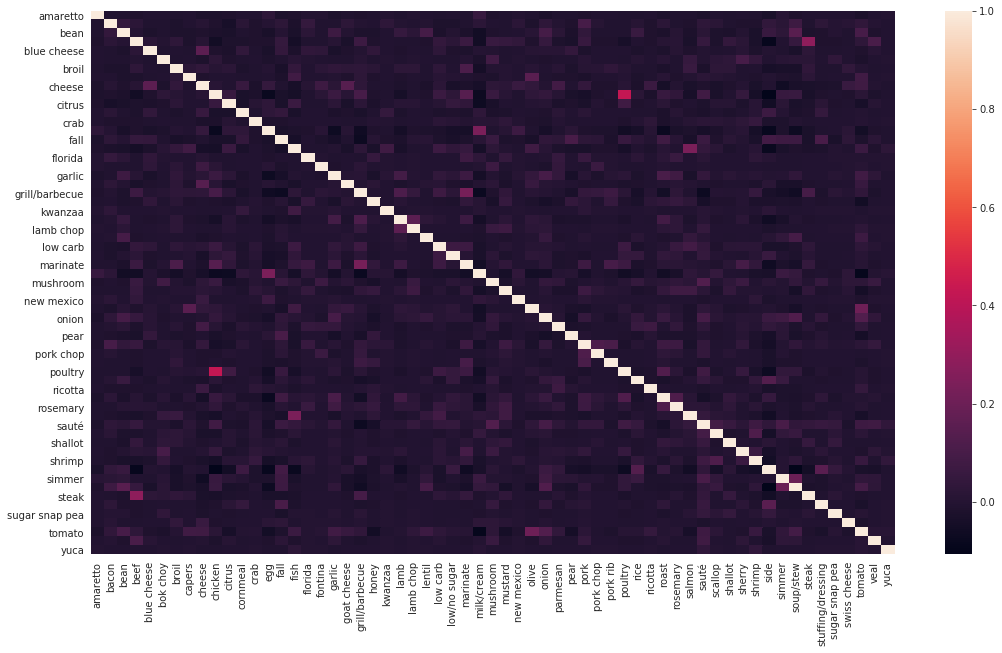

In [51]:
corrmat_5 = X.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corrmat_5)
plt.show()

In [52]:
corrmat_5

,amaretto,bacon,bean,beef,blue cheese,bok choy,broil,capers,cheese,chicken,citrus,cornmeal,crab,egg,fall,fish,florida,fontina,garlic,goat cheese,grill/barbecue,honey,kwanzaa,lamb,lamb chop,lentil,low carb,low/no sugar,marinate,milk/cream,mushroom,mustard,new mexico,olive,onion,parmesan,pear,pork,pork chop,pork rib,poultry,rice,ricotta,roast,rosemary,salmon,sauté,scallop,shallot,sherry,shrimp,side,simmer,soup/stew,steak,stuffing/dressing,sugar snap pea,swiss cheese,tomato,veal,yuca
amaretto,1.000000,-0.010123,-0.010154,-0.012064,-0.006695,-0.003746,-0.008621,-0.005737,-0.016359,-0.016421,-0.012655,-0.006914,-0.004396,0.030834,-0.016363,-0.012579,-0.002291,-0.002646,-0.017030,-0.007734,-0.013912,-0.008865,-0.001707,-0.008002,-0.002291,-0.004462,-0.008189,-0.006783,-0.009908,0.055178,-0.011800,-0.010093,-0.002160,-0.010032,-0.021181,-0.009399,-0.007616,-0.012452,-0.003331,-0.003331,-0.010572,-0.009688,-0.004462,-0.016277,-0.007811,-0.007850,-0.019240,-0.005526,-0.008115,-0.004528,-0.008933,-0.025726,0.013822,-0.014643,-0.006695,-0.004528,-0.003899,-0.003056,-0.020563,-0.004119,-0.001527
bacon,-0.010123,1.000000,0.042681,0.021354,-0.010391,-0.010825,-0.017903,-0.006164,0.007256,-0.012512,-0.036571,0.014734,-0.012703,0.002481,0.026180,-0.021596,0.045140,-0.007647,-0.007811,0.024362,0.000208,-0.005135,0.029777,-0.000526,-0.006621,0.000448,-0.016297,-0.019603,-0.010206,0.022627,-0.002804,-0.011059,0.021206,-0.016849,0.030225,-0.001335,-0.014109,0.098063,0.008199,-0.009628,-0.007437,0.009646,-0.012895,0.019469,-0.007153,-0.015012,0.029449,0.016445,-0.008585,-0.013084,-0.012260,0.037829,0.014761,0.073524,-0.010391,0.026372,0.003979,0.010589,0.034139,0.002537,-0.004412
bean,-0.010154,0.042681,1.000000,0.005801,-0.019405,-0.010857,-0.017998,-0.016630,-0.012461,-0.020496,-0.026924,-0.011388,-0.012741,-0.029297,0.003029,-0.026652,0.019167,-0.007670,0.070746,0.000872,-0.017938,-0.018887,-0.004948,0.051925,0.019167,0.093509,-0.023736,-0.002028,-0.022595,-0.054049,-0.013398,-0.011198,-0.006260,0.013299,0.092664,0.017827,-0.022077,0.038167,-0.009656,-0.009656,-0.007594,0.059507,-0.012934,-0.023773,0.008113,-0.022754,0.018864,-0.016019,-0.023521,-0.000009,-0.025894,0.053658,0.024001,0.145800,-0.019405,-0.013124,0.003902,-0.008859,0.098043,-0.011940,-0.004425
beef,-0.012064,0.021354,0.005801,1.000000,0.022572,0.000573,0.029851,-0.019759,0.006501,-0.053259,-0.018660,-0.016444,-0.015139,-0.013283,0.048765,-0.043323,-0.007890,-0.009113,0.008466,-0.026636,0.070286,-0.013138,-0.005879,-0.008370,-0.007890,-0.015368,0.040616,0.021685,0.064975,-0.051216,0.061233,0.052373,0.039175,-0.013930,0.050206,-0.015924,-0.026231,0.054075,-0.011474,-0.011474,-0.036409,-0.006730,-0.015368,0.007059,0.012381,-0.027036,0.049286,-0.019034,0.041476,0.017910,-0.025011,-0.086279,-0.004411,0.051575,0.288740,-0.015593,-0.013430,-0.010526,0.030544,0.108440,-0.005258
blue cheese,-0.006695,-0.010391,-0.019405,0.022572,1.000000,-0.007159,-0.006043,-0.010964,0.154206,-0.014051,-0.024185,0.038441,-0.008401,-0.025017,0.042209,-0.024040,0.034130,0.028301,-0.026946,-0.014781,0.000138,0.033857,-0.003262,-0.015293,-0.004378,-0.008528,0.028202,-0.012964,-0.018936,0.001767,0.000733,-0.010307,-0.004128,0.007928,0.011127,0.010860,0.044231,-0.016410,-0.006367,-0.006367,-0.003007,-0.018516,-0.008528,-0.019465,0.008018,-0.015002,-0.001336,-0.010562,-0.004449,0.010917,-0.017073,-0.000314,-0.010719,-0.027985,0.027184,-0.008653,-0.007452,-0.005841,-0.015296,0.013616,-0.002918
bok choy,-0.003746,-0.010825,-0.010857,0.000573,-0.007159,1.000000,-0.009219,-0.006135,-0.017493,0.023385,-0.013532,-0.007394,-0.004700,-0.019834,-0.011076,0.012485,-0.002450,-0.002829,-0.008287,-0.008270,0.008800,-0.009479,-0.001825,-0.008557,-0.002450,-0.004771,-0.008756,-0.007253,0.005599,-0.021162,0.083645,-0.010792,-0.002309,-0.010727,-0.014336,-0.010051,-0.008144,0.012862,-0.003562,-0.003562,-0.011304,0.006181,-0.004771,0.013537,-0.008353,0.052301,-0.002636,0.022577,0.030513,0.099179,0.044055,-0.005870,0.011191,0.0182

In [0]:
# select features with high collinearity for removal
X = X.drop(['chicken', 'fish', 'beef', 'cheese', 'milk/cream', 'marinate', 'tomato', 'side'], 1)

In [59]:
X.shape

(6016, 53)

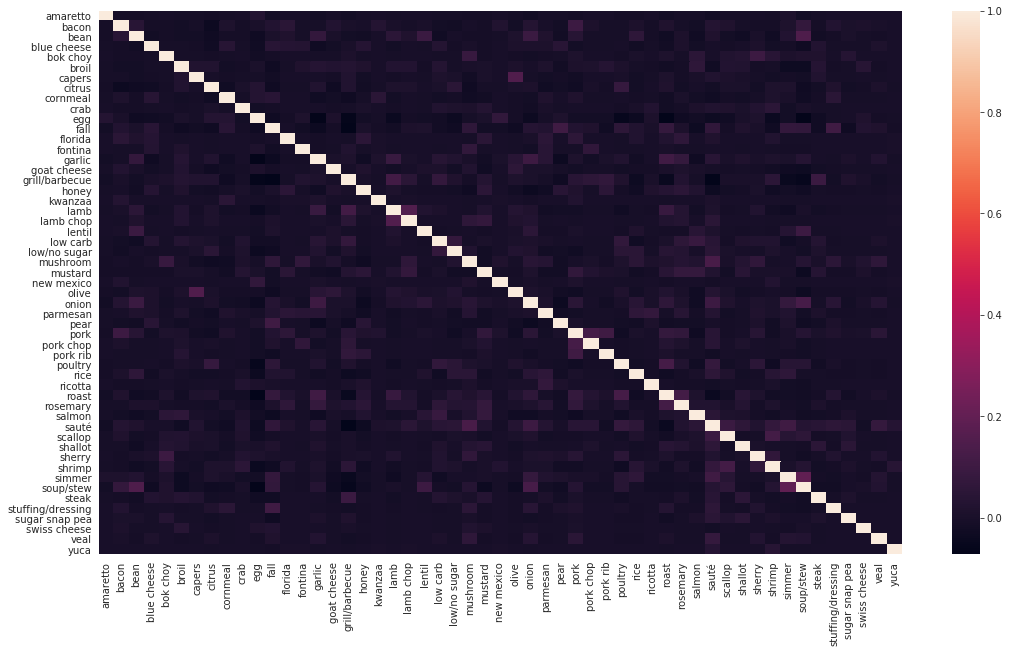

In [60]:
corrmat_6 = X.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corrmat_6)
plt.show()

In [61]:
# fit model with current shape 53
svc.fit(X, bi_y)
print(svc.score(X, bi_y))

score = cross_val_score(svc, X, bi_y, cv=10)
print(score)
print(score.mean())

0.8631981382978723
[0.86235489 0.86235489 0.86235489 0.86356073 0.86356073 0.86356073
 0.86356073 0.86356073 0.86356073 0.86356073]
0.8631989801408929
